### **Predicting UK Housing Prices with Machine Learning**

This project delves into the UK housing market, aiming to develop a robust machine learning model for predicting house prices. Through meticulous data analysis and feature engineering, the project strives to uncover hidden patterns and trends within the UK housing market.

**Project Steps:**

1. **Data Collection:** Gather comprehensive housing data from reliable sources.
2. **Data Cleaning:**  Identify and handle missing values, outliers, and inconsistencies in the dataset.
3. **Exploratory Data Analysis (EDA):** Explore the data through visualizations and summary statistics to understand distributions, relationships, and potential predictors.
4. **Feature Engineering:** Create new features from existing ones to enhance model accuracy. Examples include transforming date/time variables into year, month, and day or creating interaction terms between features.
5. **Feature Selection:**  Identify the most relevant features for price prediction. Techniques like feature importance from tree-based models can be employed.
6. **Model Selection:** Choose a suitable machine learning model (e.g., Random Forest, Gradient Boosting) for regression tasks.
7. **Model Training and Evaluation:** Train the selected model on the prepared dataset and evaluate its performance using metrics such as RMSE.
8. **Hyperparameter Tuning:** Optimize model parameters for improved accuracy.
9. **Prediction and Interpretation:** Utilize the trained model to predict house prices and interpret the model's results for insights into key factors influencing prices.
10. **Deployment (Optional):** Deploy the model as an interactive tool or API for users to access.

This code snippet sets up the necessary environment for a machine learning project and imports essential libraries.

In [ ]:
!pip install kaggle
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastbook
fastbook.setup_book()
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import seaborn as sns
sns.set_style("whitegrid")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gd

# Loading and Inspecting the UK Housing Dataset

This code loads the UK housing dataset and displays basic information about its structure.


In [ ]:
df = pd.read_csv('gdrive/MyDrive/UkHousingPaid/UkHousing.csv', low_memory=False)

In [ ]:
df.dtypes

,0
Transaction unique identifier,object
Price,int64
Date of Transfer,object
Property Type,object
Old/New,object
Duration,object
Town/City,object
District,object
County,object
PPDCategory Type,object


In [ ]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

**Columns in the Dataset:**

* `Transaction unique identifier`
* `Price`
* `Date of Transfer`
* `Property Type`
* `Old/New`
* `Duration`
* `Town/City`
* `District`
* `County`
* `PPDCategory Type`
* `Record Status - monthly file only`

# Feature Engineering and Data Cleaning

This code performs feature engineering and data cleaning steps on the UK housing dataset.


In [ ]:
df['Town/City'].unique()

array(['LEIGH', 'BRACKNELL', 'LONDON', ..., 'BILLINGHURST', 'PORT DINORWIC', 'GATWICK'], dtype=object)

**Create Region Feature:**
   * Creates a new 'region' column based on whether the 'Town/City' is London or not.

In [ ]:
df['region'] = np.where(df['Town/City'] == 'LONDON', 'London', 'notLondon')
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,region
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,notLondon
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,notLondon
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,London
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,notLondon
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,notLondon
...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,notLondon
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,notLondon
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,notLondon
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,notLondon


**Check for Missing Values:**
   * Calculates and displays the number of missing values in each column.

In [ ]:
print(df.isnull().sum())

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
region                               0
dtype: int64


**Remove Duplicate Rows:**
   * Removes any duplicate rows from the DataFrame.

In [ ]:
df = df.drop_duplicates()

**Rename Columns:**
   * Creates copies of 'Date of Transfer', 'Property Type', and 'PPDCategory Type' and names them 'date', 'type', and 'ppd', respectively.

In [ ]:
df['date']=df['Date of Transfer']
df['type']=df['Property Type']
df['ppd']=df['PPDCategory Type']
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,region,date,type,ppd
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,notLondon,2004-07-16 00:00,T,A
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,notLondon,2004-05-28 00:00,S,A
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,London,2004-05-25 00:00,F,A
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,notLondon,2004-05-07 00:00,S,A
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,notLondon,2004-05-28 00:00,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,notLondon,2017-02-20 00:00,S,A
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,notLondon,2017-02-15 00:00,D,A
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,notLondon,2017-02-24 00:00,D,A
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,notLondon,2017-02-22 00:00,T,A


* Converts the 'date' column to the datetime data type using `pd.to_datetime()`. This allows for date-based operations and analysis.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

,0
Transaction unique identifier,object
Price,int64
Date of Transfer,object
Property Type,object
Old/New,object
Duration,object
Town/City,object
District,object
County,object
PPDCategory Type,object


# Log Transform of 'Price' and Visualization

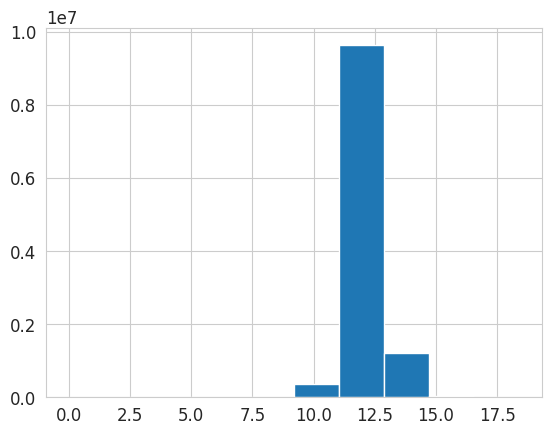

In [ ]:
dep_var = 'Price'
df[dep_var] = np.log(df[dep_var])
df['Price'].hist()
plt.show()

* `dep_var = 'Price'`: Assigns 'Price' to the variable `dep_var`, likely indicating it's the dependent variable for modeling.
* `df[dep_var] = np.log(df[dep_var])`: Applies a natural logarithmic transformation to the 'Price' column. This can help normalize the distribution of prices and improve model performance, especially for skewed data.
* `df['Price'].hist()`: Creates a histogram of the log-transformed 'Price' data to visualize its distribution.
* `plt.show()`: Displays the created histogram.

###Extract Date Features and Drop Columns

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only',
       'region', 'date', 'type', 'ppd', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
df.drop(['date','Transaction unique identifier','Date of Transfer','Property Type',
         'PPDCategory Type','Record Status - monthly file only', 'day', 'ppd'], axis=1, inplace=True)

* Extracts year, month, and day from the 'date' column and creates new columns for each.
* Removes original date columns ('date', 'Date of Transfer') and other unnecessary columns ('Transaction unique identifier', 'Property Type', 'PPDCategory Type', 'Record Status - monthly file only', 'day', 'ppd') from the DataFrame.

In [ ]:
df.dtypes

,0
Price,float64
Old/New,object
Duration,object
Town/City,object
District,object
County,object
region,object
type,object
year,int32
month,int32


In [ ]:
df

,Price,Old/New,Duration,Town/City,District,County,region,type,year,month
0,11.512925,N,L,LEIGH,WIGAN,GREATER MANCHESTER,notLondon,T,2004,7
1,12.323856,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,notLondon,S,2004,5
2,12.206073,N,L,LONDON,LAMBETH,GREATER LONDON,London,F,2004,5
3,11.580584,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,notLondon,S,2004,5
4,11.951180,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,notLondon,D,2004,5
...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,N,F,LEEDS,LEEDS,WEST YORKSHIRE,notLondon,S,2017,2
11244670,13.282686,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,notLondon,D,2017,2
11244671,12.520883,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,notLondon,D,2017,2
11244672,10.491274,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,notLondon,T,2017,2


### Visualizations of Price Distribution and Relationships

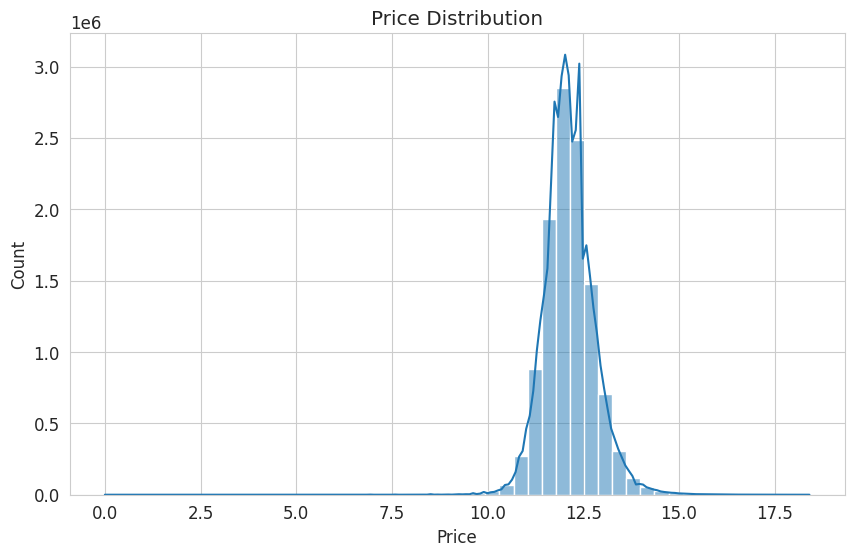

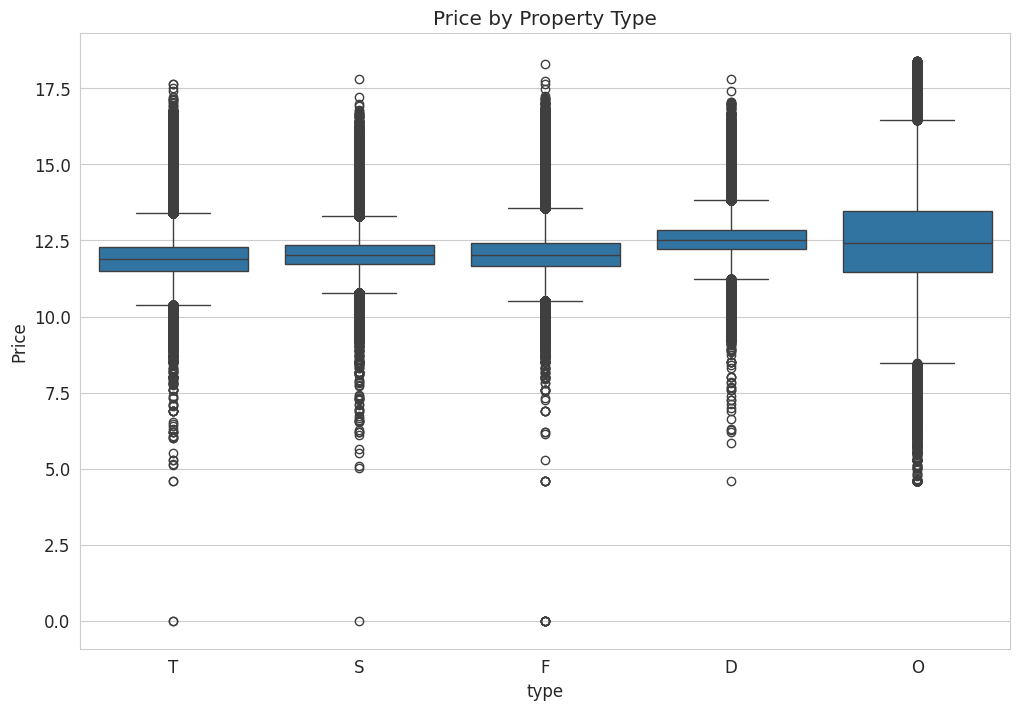

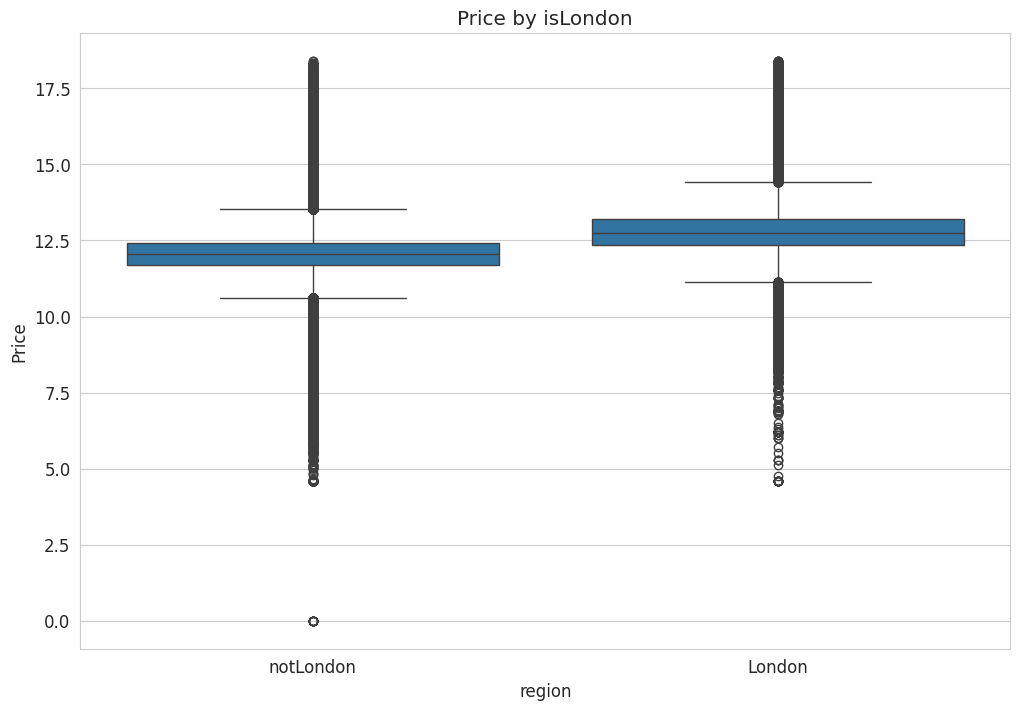

In [ ]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()
# Boxplot by property type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='Price', data=df)
plt.title('Price by Property Type')
plt.show()
# Boxplot by property isLondon
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='Price', data=df)
plt.title('Price by isLondon')
plt.show()

This code creates visualizations to explore the distribution of house prices and their relationship with property type and region.

* **Price Distribution:** Generates a histogram of the 'Price' column with 50 bins and a kernel density estimate (kde) to show the distribution of prices.

* **Price by Property Type:** Creates a boxplot to compare the distribution of 'Price' for different property types ('type').

* **Price by Region:** Creates a boxplot to compare the distribution of 'Price' between London and other regions ('region').

In [ ]:
df.columns

Index(['Price', 'Old/New', 'Duration', 'Town/City', 'District', 'County',
       'region', 'type', 'year', 'month'],
      dtype='object')

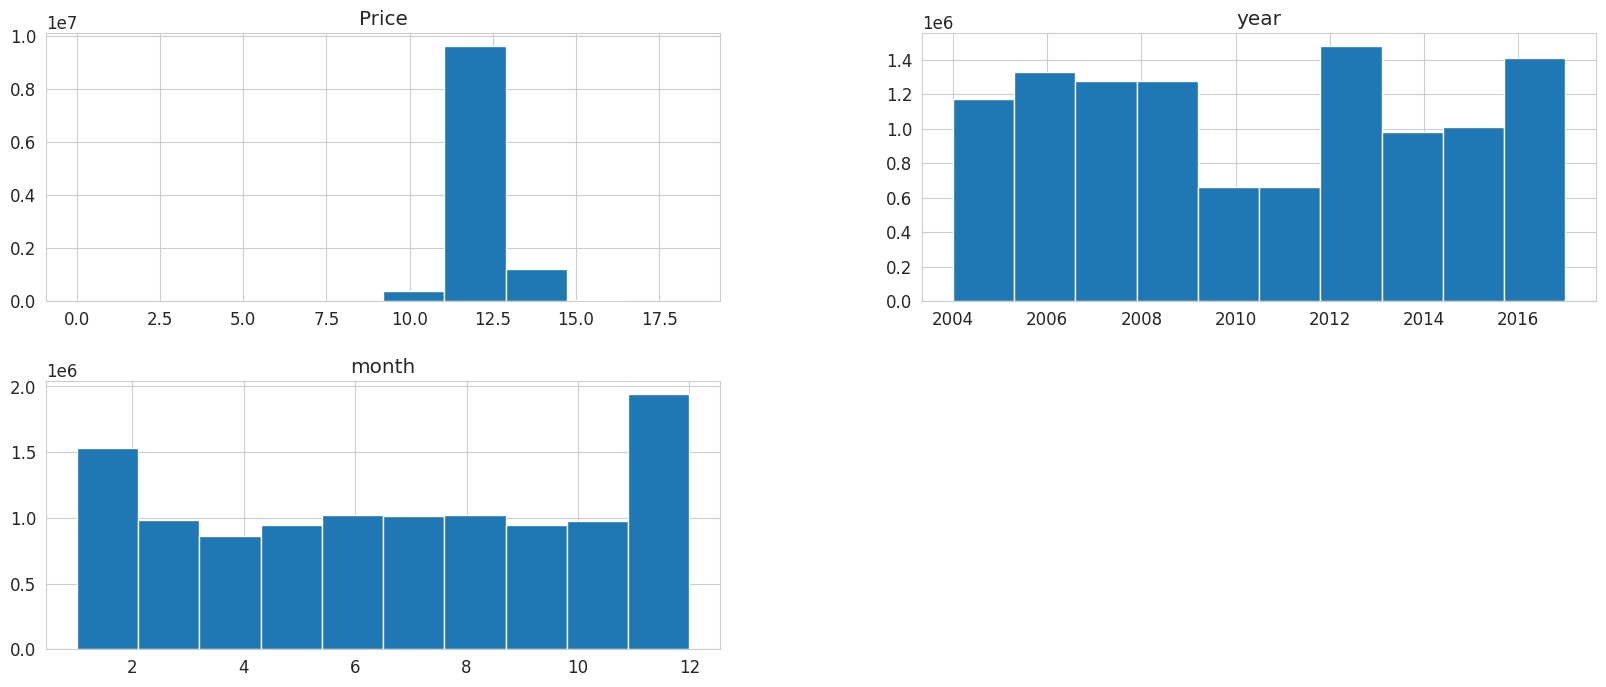

In [ ]:
df.hist(figsize=(20, 8))
plt.show()

# Create Dummy Variables

In [ ]:
df = pd.get_dummies(df, columns=['Old/New', 'Duration', 'type', 'region'])

In [ ]:
df

,Price,Town/City,District,County,year,month,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,type_D,type_F,type_O,type_S,type_T,region_London,region_notLondon
0,11.512925,LEIGH,WIGAN,GREATER MANCHESTER,2004,7,True,False,False,True,False,False,False,False,False,True,False,True
1,12.323856,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,2004,5,True,False,True,False,False,False,False,False,True,False,False,True
2,12.206073,LONDON,LAMBETH,GREATER LONDON,2004,5,True,False,False,True,False,False,True,False,False,False,True,False
3,11.580584,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,2004,5,True,False,True,False,False,False,False,False,True,False,False,True
4,11.951180,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,2004,5,True,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,LEEDS,LEEDS,WEST YORKSHIRE,2017,2,True,False,True,False,False,False,False,False,True,False,False,True
11244670,13.282686,WETHERBY,LEEDS,WEST YORKSHIRE,2017,2,True,False,True,False,False,True,False,False,False,False,False,True
11244671,12.520883,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,2017,2,True,False,False,True,False,True,False,False,False,False,False,True
11244672,10.491274,HALIFAX,CALDERDALE,WEST YORKSHIRE,2017,2,True,False,True,False,False,False,False,False,False,True,False,True


* Converts categorical columns ('Old/New', 'Duration', 'type', 'region') into dummy/indicator variables. This process transforms categorical data into a numerical format that can be used in machine learning models.

In [ ]:
df.drop(['Duration_U', 'type_O'],axis=1, inplace=True)

# Convert Dummy Variables to Integer Type

In [ ]:
df['Old/New_N'] = df['Old/New_N'].astype('int')
df['Old/New_Y'] = df['Old/New_Y'].astype('int')
df['Duration_F'] = df['Duration_F'].astype('int')
df['Duration_L'] = df['Duration_L'].astype('int')
df['type_D'] = df['type_D'].astype('int')
df['type_F'] = df['type_F'].astype('int')
df['type_S'] = df['type_S'].astype('int')
df['type_T'] = df['type_T'].astype('int')
df['region_London'] = df['region_London'].astype('int')
df['region_notLondon'] = df['region_notLondon'].astype('int')

In [ ]:
df['Town/City'] = df['Town/City'].factorize()[0].astype('float32')
df['District'] = df['District'].factorize()[0].astype('float32')
df['County'] = df['County'].factorize()[0].astype('float32')

* Converts the data type of dummy variables ('Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_L', 'type_D', 'type_F', 'type_S', 'type_T', 'region_London', 'region_notLondon') from likely float or object to integer. This ensures consistency and compatibility with machine learning models.

* Converts categorical columns ('Town/City', 'District', 'County') into numerical representations using factorizing. Each unique category is assigned an integer value. The result is then converted to float32 data type.

<Axes: >

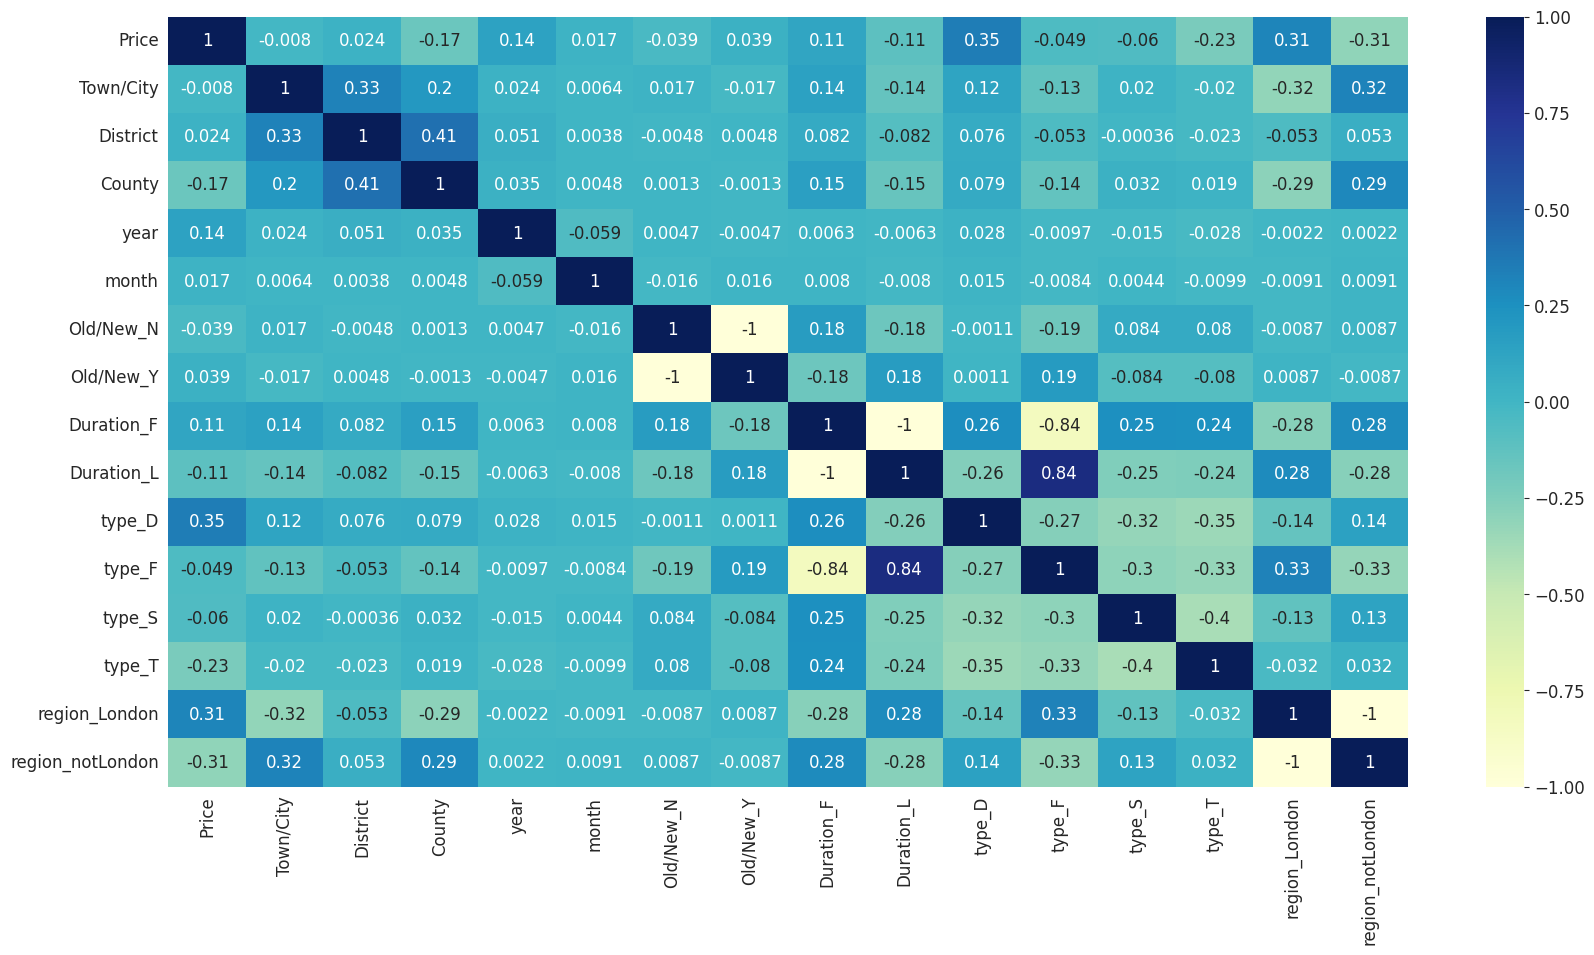

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# Data Preprocessing and Splitting

In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
cond = (df.year<2016)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [ ]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(9837018, 1407656)

* Defines preprocessing steps: `Categorify` (converts columns to categorical type) and `FillMissing` (handles missing values).
* Creates training and validation sets: Data with 'year' less than 2016 is used for training, and data with 'year' 2016 or greater is used for validation.
* Identifies continuous and categorical columns.
* Creates a `TabularPandas` object to handle the dataset for tabular modeling.
* Displays the number of rows in the training and validation sets.

# Decision Tree Model Training and Visualization


In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

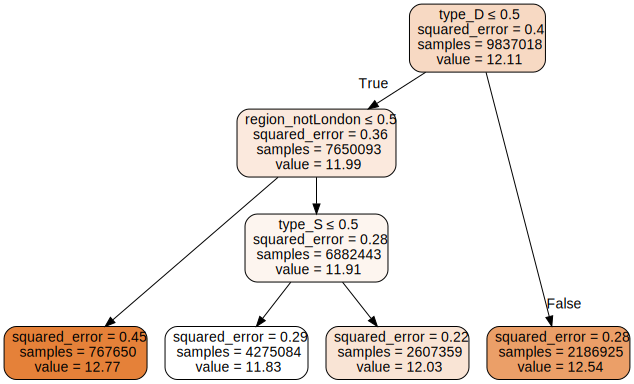

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

* Assigns independent variables (`xs`) and dependent variable (`y`) from the training data.
* Assigns independent variables (`valid_xs`) and dependent variable (`valid_y`) from the validation data.
* Creates a `DecisionTreeRegressor` with a maximum of 4 leaf nodes.
* Trains the decision tree model using the training data.
* Visualizes the trained decision tree using `draw_tree`.

# Decision Tree Visualization with dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


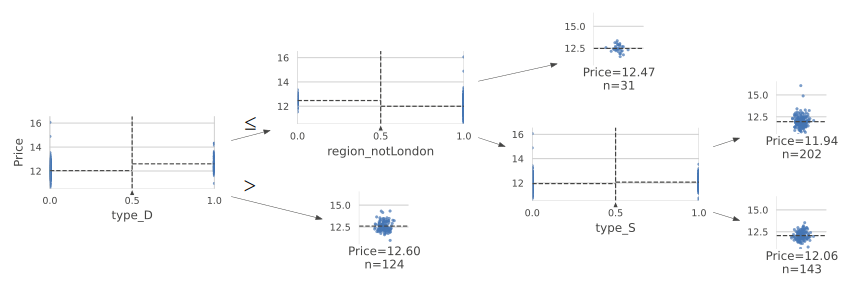

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

* Takes a random sample of 500 data points from the training data.
* Visualizes the decision tree using `dtreeviz`, providing detailed information about decision boundaries, feature distributions, and predictions for each node.
* Customizes the visualization with font settings, scale, and orientation.

# Retrain and Visualize Decision Tree

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


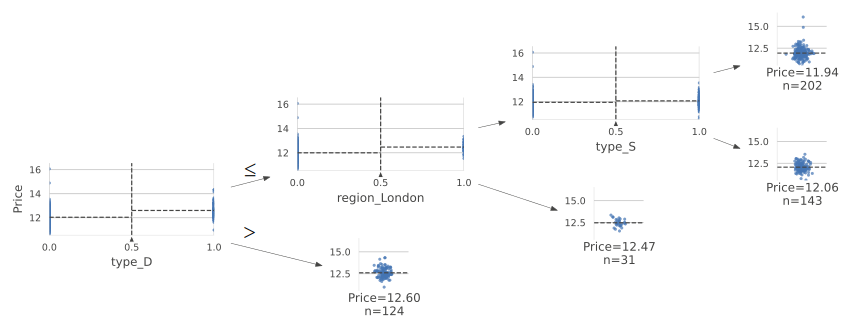

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

* Retrains the `DecisionTreeRegressor` with a maximum of 4 leaf nodes using the training data.
* Visualizes the retrained decision tree using `dtreeviz`, using the same sample of 500 data points and customization options as before.

# Decision Tree Regression and Evaluation

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y)

0.331688

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.603403

In [ ]:
m.get_n_leaves(), len(xs)

(1158244, 9837018)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.357253, 0.54486)

* Trains a `DecisionTreeRegressor` without specifying `max_leaf_nodes`, allowing the tree to grow fully.
* Defines a function `r_mse` to calculate the rounded RMSE between predictions and actual values.
* Defines a function `m_rmse` to calculate the rounded RMSE of a model's predictions on a given dataset.
* Evaluates the RMSE of the model on the training data (output: 0.331688). This low RMSE indicates the model performs well on the data it was trained on.
* Evaluates the RMSE of the model on the validation data (output: 0.603403). This higher RMSE compared to the training RMSE suggests the model might be overfitting and doesn't generalize well to unseen data.
* Prints the number of leaves in the decision tree and the number of data points in the training set (output: 1158244 leaves, 9837018 data points). The extremely high number of leaves in the tree (almost as many as training data points) confirms the model is likely overfitting. This complex tree has memorized the training data instead of learning general patterns.

In [ ]:
m.get_n_leaves()

218221

* `m.get_n_leaves()`: Returns the number of leaves in the trained decision tree model (`m`). This can be an indicator of the model's complexity. A very high number of leaves might suggest overfitting.

# Random Forest Model Training and Evaluation

In [ ]:
def rf(xs, y, n_estimators=100, max_samples=200_000,
       max_features='sqrt', min_samples_leaf=20, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.414582, 0.589149)

* Defines a function `rf` that creates and trains a `RandomForestRegressor` with specified parameters:
    * `n_estimators`: Number of trees in the forest (default: 100)
    * `max_samples`: Number of samples to draw from the training set for each tree (default: 200,000)
    * `max_features`: Number of features to consider when looking for the best split (default: 'sqrt')
    * `min_samples_leaf`: Minimum number of samples required to be at a leaf node (default: 20)
    * `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy (default: True)
* Trains a random forest model `m` using the training data (`xs`, `y`).
* Evaluates the RMSE of the model on the training data (output: 0.414582). This RMSE is higher than the single decision tree, suggesting the individual trees in the random forest are less overfit to the training data.
* Evaluates the RMSE of the model on the validation data (output: 0.589149). This RMSE is lower than the single decision tree and closer to the training RMSE, indicating the random forest generalizes better and has reduced overfitting compared to a single decision tree.

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
r_mse(m.oob_prediction_, y)

0.415018

* Calculates the RMSE of the model's predictions on the out-of-bag samples. OOB samples are data points that were not used to train a particular tree in the random forest. This provides an estimate of the model's performance on unseen data without the need for a separate validation set.

The obtained OOB RMSE (0.415018) is very close to the training RMSE (0.414582). This suggests that the model is generalizing well and not overfitting significantly. The OOB score provides confidence that the model's performance on the validation set is likely a good representation of its performance on new, unseen data.

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
preds.shape

(100, 1407656)

* `preds.shape`: Returns the dimensions of the `preds` array. In this case, it has 100 rows and 1,407,656 columns.
    * **100 rows:**  This matches the `n_estimators` parameter of your random forest model, meaning each row corresponds to the predictions made by a single tree in the forest.
    * **1,407,656 columns:** This is likely the number of data points in your validation set. Each column represents the predictions for a single data point across all 100 trees.

This shape indicates that I have stored the individual predictions from each tree for every data point in my validation set. This information is valuable for understanding the diversity of predictions among trees and can be used to calculate ensemble predictions by averaging or using other aggregation techniques. It also allows for a deeper analysis of the model's behavior and potential areas for improvement.

# Calculate and Display Feature Importances

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

* Defines a function `rf_feat_importance` that calculates feature importances from a random forest model (`m`) and returns a DataFrame sorted by importance.
* Calculates feature importances using the trained random forest model (`m`) and the training data's independent variables (`xs`).
* Displays the top 10 most important features.

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
9,type_D,0.198537
2,County,0.197069
0,Town/City,0.122241
1,District,0.109523
13,region_London,0.083230
14,region_notLondon,0.066094
12,type_T,0.063013
3,year,0.038138
11,type_S,0.033862
7,Duration_F,0.025278


# Feature Importance Results

The output shows the top 10 features and their importance scores:

* `type_D`: This feature, likely representing a specific property type Detached, has the highest importance (0.198537), suggesting it's a strong predictor of house prices.
* `County`: The county where the property is located is the second most important feature (0.197069), indicating regional variations in house prices.
* `Town/City`: The specific town or city within the county also plays a significant role (0.122241) in determining house prices.
* `District`: District-level variations are also captured as an important feature (0.109523).
* `region_London`: Being located in London is a strong predictor (0.083230), likely reflecting higher house prices in the capital.
* Other features like `region_notLondon`, `type_T`, `year`, `type_S`, and `Duration_F` have lower but still notable importance.


These results highlight the importance of location-related features (county, town/city, district, region) and property type in predicting house prices. The model has learned that these factors have a strong influence on the target variable.

# Visualize, Select, and Retrain with Important Features

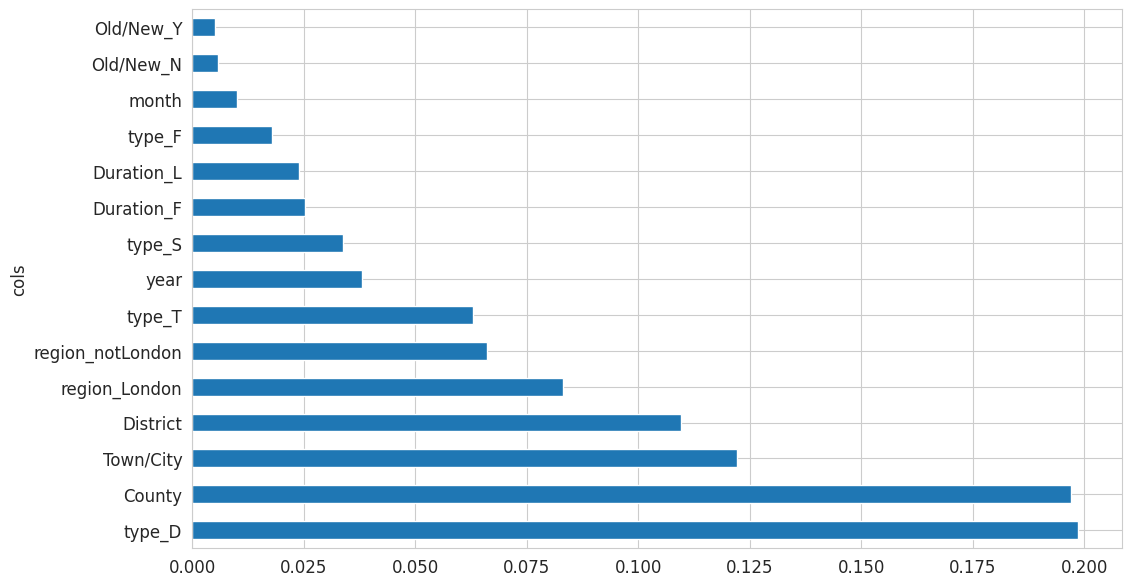

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

15

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.415819, 0.591694)

* Defines a function `plot_fi` to create a horizontal bar plot of feature importances.
* Visualizes the feature importances of the top 30 features.
* Selects features with importance scores greater than 0.005.
* Creates new DataFrames (`xs_imp`, `valid_xs_imp`) containing only the selected features.
* Retrains the random forest model using only the selected features.
* Evaluates the RMSE of the retrained model on the training and validation data with selected features (output: 0.415819, 0.591694).

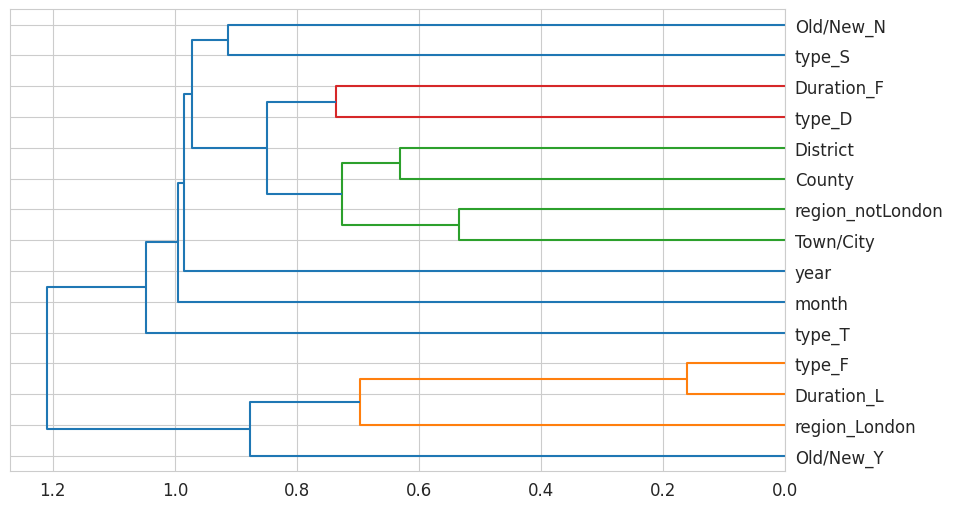

In [ ]:
cluster_columns(xs_imp)

# Conclusion and Next Steps

This project has successfully developed a random forest model for predicting UK house prices. The model demonstrates good predictive performance, with RMSE values of 0.415819 on the training set and 0.591694 on the validation set.

Feature importance analysis revealed that property type, location-based features (county, town/city, district, region), and other factors like the duration of ownership contribute significantly to predicting house prices.

Potential next steps for this project include:

* **Hyperparameter Tuning:** Explore different hyperparameter settings for the random forest model (e.g., `n_estimators`, `max_depth`, `min_samples_split`) to potentially improve its performance.
* **Feature Engineering:** Experiment with creating new features or transforming existing ones to capture more complex relationships in the data.
* **Model Comparison:** Evaluate other machine learning models, such as gradient boosting or neural networks, to see if they can achieve better predictive accuracy.
* **Deployment:** If desired, deploy the model as an interactive tool or API for users to access and make predictions on new data.

By further refining the model and exploring these additional steps, this project can provide valuable insights into the UK housing market and offer a reliable tool for predicting house prices.